### Surviving The Titanic

###### This notebook aims to predict factors that cause survival using a logistic regression model.

###### Importing the required modules

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from scipy.stats import pearsonr

In [34]:
df = pd.read_csv('train.csv')

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.set_index('PassengerId',inplace=True)

In [37]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [38]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### There are 687 missing values for Cabin. Those missing values account for 77.1% of the Cabin variable. The specific cabins that passengers occupied is not important for predicting whether or not those passengers will survive.

In [39]:
df.drop('Cabin',axis=1,inplace=True)

###### We will now analyse the age column to see if there is any significance

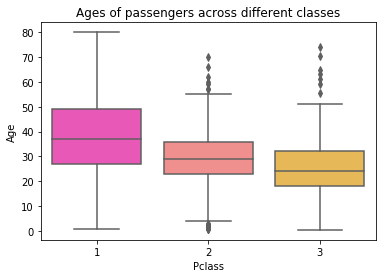

In [40]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='spring')
plt.title('Ages of passengers across different classes')
plt.show()

###### First class passengers are more likely to be older than passengers of other classes. Third class has a higher concentration of younger passengers.

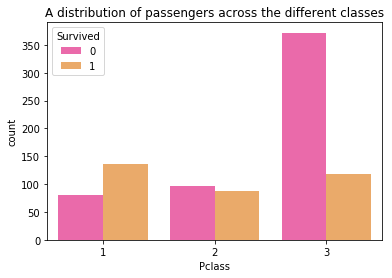

In [41]:
sns.countplot('Pclass',hue='Survived',data=df,palette='spring')
plt.title('A distribution of passengers across the different classes')
plt.show()

##### From the above plot we can see that the biggest number of survivors came from first class. The plot showing the distribution of ages showed that most first class passengers are older. It is for this reason that I will impute missing values with the mean to prevent losing valuable data.

In [42]:
df = df.fillna(df.mean())

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


#### EDA

In [73]:
col = ['Parch','Survived','Pclass','Sex','SibSp']

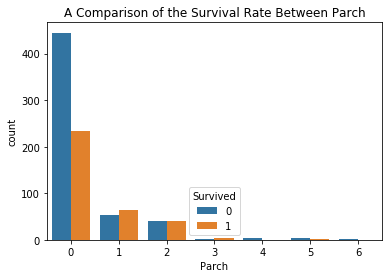

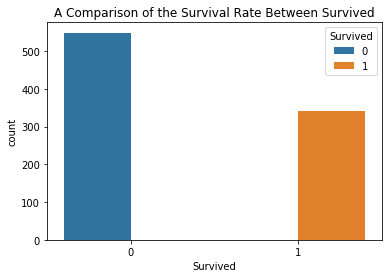

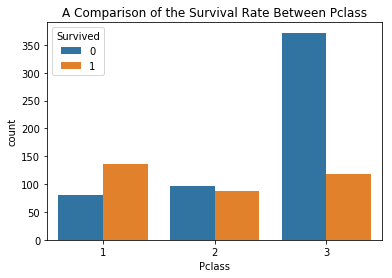

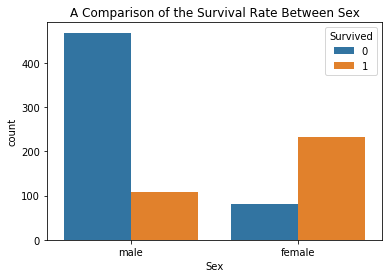

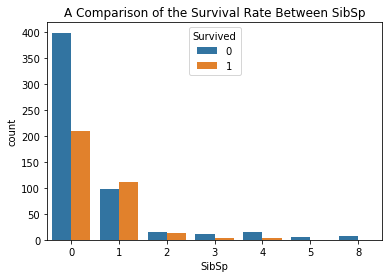

In [74]:
for i in df[col]:
    sns.countplot(i,data=df,hue='Survived')
    plt.title('A Comparison of the Survival Rate Between ' + i)
    plt.show()

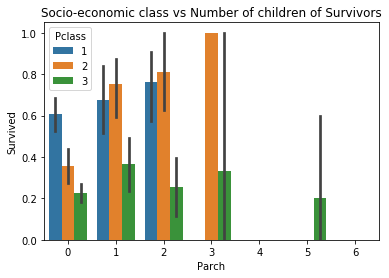

In [75]:
sns.barplot('Parch','Survived',data=df,hue='Pclass')
plt.title('Socio-economic class vs Number of children of Survivors')
plt.show()

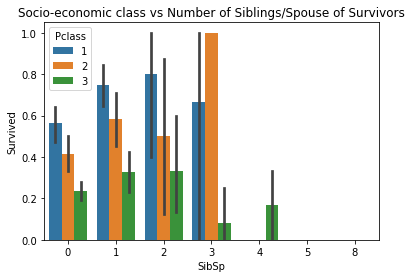

In [76]:
sns.barplot('SibSp','Survived',data=df,hue='Pclass')
plt.title('Socio-economic class vs Number of Siblings/Spouse of Survivors')
plt.show()

#### Sex
###### Males were more likely to drown than survive. Nearly 500 men died compared to less tha a hundred women dying. Approximately 100 men survived while more than 200 women survived. This is more than twice the number of men that survived.
#### Class
###### Third class passengers were less likely to survive than other classes with approx 350 third class passengers dying compared to less than 100 first class passengers who didn't make it. The biggest number of survivors came from first class. However, when looking at the entire countplot we can see that survivors are more or less evenly distributed across classes. More than 100 people survived in each class.
#### Parch
###### Parch shows the number of children a passenger had. The biggest number of survivors came from people without children aboard. The common trend is that the more children a passenger had, the lower the number of survivors. Upon further inspection we can see that most of the passengers who didn't have children were also in first class. Surviving passengers with children were more likely to be first or second class.
#### SibSp
###### SibSp shows whether or not passengers had a spouse/sibling. The biggest number of survivors came from those without siblings/spouses. The number of passengers with more than one sibling was relatively low and the chance of survival was even lower. Again we see that for any group, the majority of survivors are from first class and the less siblings a passenger has, the more likely they are to survive.

In [46]:
df_dummy = pd.get_dummies(df,prefix_sep='_',columns=['Sex'],drop_first=True)

In [58]:
x = df_dummy[['Parch','Sex_male','Fare','Pclass','SibSp','Age']]
y = df_dummy['Survived']

In [59]:
# The data is split. 80% of the data goes into the training set and the remaining 20% is used to test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
x_train.head()

,Parch,Sex_male,Fare,Pclass,SibSp,Age
PassengerId,,,,,,
332,0,1,28.5000,1,0,45.5
734,0,1,13.0000,2,0,23.0
383,0,1,7.9250,3,0,32.0
705,0,1,7.8542,3,1,26.0
814,2,0,31.2750,3,4,6.0


In [61]:
#Training the model
logreg = LogisticRegression(solver='lbfgs')
model = logreg.fit(x_train,y_train)

In [62]:
# Testing the model
y_pred = model.predict(x_test)

In [63]:
accuracy_score(y_pred,y_test)*100

81.00558659217877

###### The model was able to predict accurately 81% of the time. 

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

   micro avg       0.81      0.81      0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [65]:
confusion_matrix(y_test,y_pred)

array([[92, 13],
       [21, 53]])

###### The confusion matrix shows us the predictions the model made. The model was able to accurately predict 92 passengers who survived as survivors, 21 people who didn't survive as survivors. The model accurately predicted 13 people who didn't survive and inaccurately predicted 53 passengers as people who didn't survive, who in reality actually survived.

In [66]:
roc_auc_score(y_test,y_pred)

0.7962033462033462

###### The roc_auc_score tells us how accurately the model is able to distinguish between classes. This model has a score of 79.62% which means the model can distinguish classes accurately about 79% of the time.

In [67]:
fpr,tpr,thresholds = roc_curve(y_pred,y_test)

Text(0.5,1,'ROC-Curve')

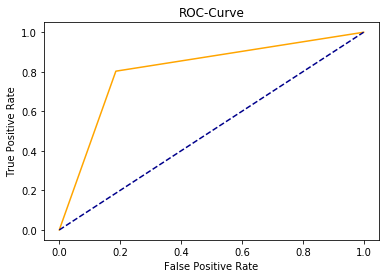

In [68]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')

###### Overdispersion is an instance where there is greater variability than expected based on a given statistical model.